Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [164]:
# imports
import pandas as pd
import json
import requests
import os
import requests

import numpy as np



import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import folium

bikeData = pd.read_csv('bikeData.csv')
fsqData = pd.read_csv('fsqData.csv')
yelpData = pd.read_csv('yelpData.csv')

dataSet = pd.merge(yelpData, fsqData, on=['restaurant_name','address', 'bikeStationAddress','rating'], how ='outer')
dataSet2= pd.merge(dataSet, bikeData, on='bikeStationAddress', how='inner')

dataSet2 = dataSet2.sort_values(by=['bikeStationDistance'],ascending=True)

dataset2=dataSet2.drop_duplicates(subset=['restaurant_name'], keep='first', inplace=True)
dataSet2['review_count'] = dataSet2['review_count'].replace(np.nan, 0)

dataSet2.to_csv("joinedData.csv",index=False)

dataSet2.sort_index

dataSet2


,restaurant_name,address,rating,review_count,reslatitude,reslongitude,bikeStationAddress,bikeStationDistance,latitude,longitude,freeBikes
7968,Tim Hortons,637 Kingston Rd,6.4,0.0,NaN,NaN,Southwood Dr / Kingston Rd - SMART,4.0,43.678685,-79.297974,1
13502,Pennies,127 Strachan Ave,8.1,0.0,NaN,NaN,Adelaide St W / Strachan Ave,5.0,43.643253,-79.412305,8
13854,Cafe Cocoro,1989 Danforth Ave,0.0,0.0,NaN,NaN,108 East Lynn Avenue,10.0,43.685081,-79.314990,4
10030,Famoso Neapolitan Pizzeria - Annex,386 Bloor St W,8.0,0.0,NaN,NaN,Dalton Rd / Bloor St W,12.0,43.666294,-79.406643,2
18010,Forno Cultura,609 King St W,9.0,0.0,NaN,NaN,620 King Street West,12.0,43.644395,-79.400654,15
...,...,...,...,...,...,...,...,...,...,...,...
19236,Perkins Family Restaurant,50 Norfinch Drive,4.0,2.0,43.756960,-79.528580,Driftwood Ave / Finch Hydro Trail,NaN,43.760362,-79.516278,10
19265,Posticino Ristorante,755 The Queensway,3.5,42.0,43.625920,-79.503580,45 Grand Avenue,NaN,43.623130,-79.491800,15
19290,Sakura Japanese Restaurant,4700 Keele Street,1.5,21.0,43.774403,-79.494064,1804 Ian Macdonald Boulevard,NaN,43.772445,-79.511912,0
19293,freshii,4700 Keele Street,3.5,2.0,43.774268,-79.503943,1804 Ian Macdonald Boulevard,NaN,43.772445,-79.511912,0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [165]:

m = folium.Map(location=[43.6532, -79.3832], zoom_start=13.5)

latitude = bikeData['latitude']
longitude = bikeData['longitude']

for i in range(len(bikeData)):
    folium.Marker(
          location=[latitude[i],longitude[i]],
    ).add_to(m)


yelpLatitude = yelpData['reslatitude']
yelpLongitude = yelpData['reslongitude']

for i in range(len(yelpData)):
        folium.Marker(
            location=[yelpLatitude[i],yelpLongitude[i]],
             icon=folium.Icon(color="red")
    ).add_to(m)




#m

Text(0.5, 0, 'distance from nearest restaruant')

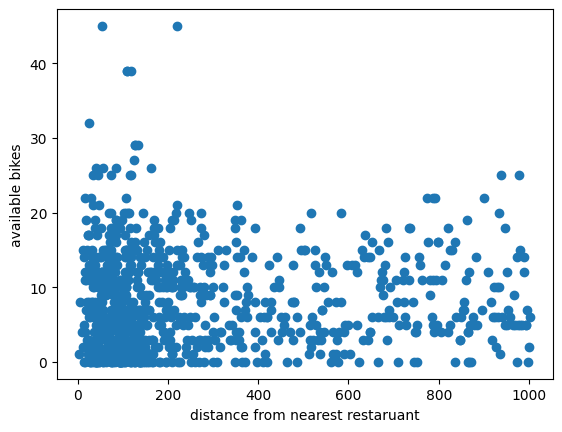

In [166]:
plt.scatter(dataSet2['bikeStationDistance'],dataSet2['freeBikes'])
plt.ylabel('available bikes')
plt.xlabel('distance from nearest restaruant')

Text(0, 0.5, 'free bikes')

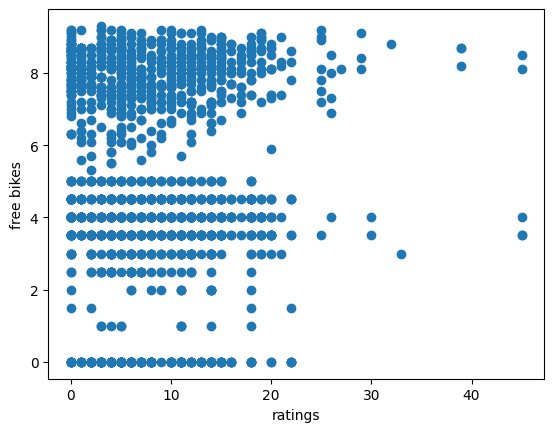

In [167]:
plt.scatter(dataSet2['freeBikes'],dataSet2['rating'])
plt.xlabel('ratings')
plt.ylabel('free bikes')

Text(0, 0.5, 'review count')

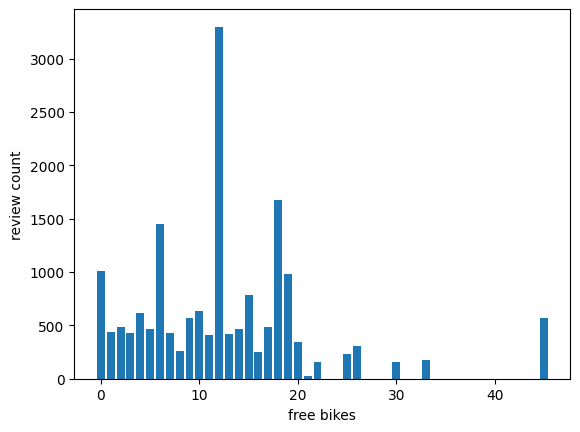

In [168]:


x = dataSet2['freeBikes']
y = dataSet2['review_count']




plt.bar(x, y)
plt.xlabel('free bikes')
plt.ylabel('review count')

#there is a problem with this graph but I don't have time to fix it

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [169]:

dataSetFilled = dataSet2

dataSetFilled['rating'] = dataSet2['rating'].replace(np.nan,0)
dataSetFilled['review_count'] = dataSet2['review_count'].replace(np.nan,0)
dataSetFilled['reslatitude'] = dataSet2['reslatitude'].replace(np.nan,0)
dataSetFilled['reslongitude'] = dataSet2['reslongitude'].replace(np.nan,0)
dataSetFilled['bikeStationDistance'] = dataSet2['bikeStationDistance'].replace(np.nan,0)

import sqlite3
from sqlite3 import Error

import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection('fullData.db')
c = connection.cursor()
dataSetFilled.to_sql('free_bikes', connection, if_exists='replace')
c.execute('SELECT * FROM free_bikes')

for row in c.fetchall():
    print(row)



Connection to SQLite DB successful
(7968, 'Tim Hortons', '637 Kingston Rd', 6.4, 0.0, 0.0, 0.0, 'Southwood Dr / Kingston Rd - SMART', 4.0, 43.678685, -79.297974, 1)
(13502, 'Pennies', '127 Strachan Ave', 8.1, 0.0, 0.0, 0.0, 'Adelaide St W / Strachan Ave', 5.0, 43.64325309, -79.4123047, 8)
(13854, 'Cafe Cocoro', '1989 Danforth Ave', 0.0, 0.0, 0.0, 0.0, '108 East Lynn Avenue', 10.0, 43.6850809, -79.3149901, 4)
(10030, 'Famoso Neapolitan Pizzeria - Annex', '386 Bloor St W', 8.0, 0.0, 0.0, 0.0, 'Dalton Rd / Bloor St W', 12.0, 43.6662942, -79.4066433, 2)
(18010, 'Forno Cultura', '609 King St W', 9.0, 0.0, 0.0, 0.0, '620 King Street West', 12.0, 43.644395, -79.4006543, 15)
(4172, 'Sam James Coffee Bar', '297 Harbord St', 8.4, 0.0, 0.0, 0.0, 'Harbord St / Clinton St', 14.0, 43.660414, -79.415646, 5)
(9244, 'Piedmont Coffee Bar', '66 Isabella St', 8.1, 0.0, 0.0, 0.0, 'Isabella St / Church St - SMART', 14.0, 43.66834, -79.38235, 0)
(2188, 'Le Select Bistro', '432 Wellington St W', 8.9, 0.0, 0.0

Look at the data before and after the join to validate your data.